In [1]:
import pandas as pd

def calculate_end_to_end_time(filename):
    # Read the CSV file
    df = pd.read_csv(filename, parse_dates=['actual', 'scheduled'])

    # Filter rows for start and end points only
    df_filtered = df[df['point_type'].isin(['Startpoint', 'Endpoint'])]

    # Group by route_id, half_trip_id, and then apply a diff function on actual time
    df_filtered = df_filtered.sort_values(by=['route_id', 'half_trip_id', 'actual'])
    df_filtered['travel_time'] = df_filtered.groupby(['route_id', 'half_trip_id'])['actual'].diff()

    # Only keep the endpoint rows which now contain the travel time in the 'travel_time' column
    df_endpoints = df_filtered[df_filtered['point_type'] == 'Endpoint']

    # Calculate mean travel time for each route
    result = df_endpoints.groupby('route_id')['travel_time'].mean()

    return result

# Example
filename = 'MBTA-Bus-Arrival-Departure-Times_2022-01.csv'
end_to_end_times = calculate_end_to_end_time(filename)
print(end_to_end_times)


route_id
01    0 days 00:30:41.214398734
04    0 days 00:22:01.269585253
07    0 days 00:13:43.023816985
08    0 days 00:49:10.517060367
09    0 days 00:26:03.175818639
                 ...           
CT3   0 days 00:27:17.831262939
SL1   0 days 00:18:17.719629057
SL2   0 days 00:11:50.853871648
SL4   0 days 00:17:13.579202699
SL5   0 days 00:15:58.121635094
Name: travel_time, Length: 151, dtype: timedelta64[ns]


In [2]:
import pandas as pd

def calculate_end_to_end_time(filename):
    # Read the CSV file
    df = pd.read_csv(filename, parse_dates=['actual', 'scheduled'])

    # Filter rows for start and end points only
    df_filtered = df[df['point_type'].isin(['Startpoint', 'Endpoint'])]

    # Group by route_id, half_trip_id, and then apply a diff function on actual time
    df_filtered = df_filtered.sort_values(by=['route_id', 'half_trip_id', 'actual'])
    df_filtered['travel_time'] = df_filtered.groupby(['route_id', 'half_trip_id'])['actual'].diff()

    # Only keep the endpoint rows which now contain the travel time in the 'travel_time' column
    df_endpoints = df_filtered[df_filtered['point_type'] == 'Endpoint']

    # Calculate mean travel time for each route
    result = df_endpoints.groupby('route_id')['travel_time'].mean()

    # Convert travel time to hours:minutes:seconds format and reset index
    result = result.dt.total_seconds().astype(int).reset_index()
    result['travel_time'] = result['travel_time'].apply(lambda x: f"{x // 3600}:{(x % 3600) // 60}:{x % 60}")

    # Write results to CSV
    result.to_csv('end_to_end_times.csv', index=False)

    print("Results saved to end_to_end_times.csv")

# Example
filename = 'MBTA-Bus-Arrival-Departure-Times_2022-01.csv'
calculate_end_to_end_time(filename)


Results saved to end_to_end_times.csv


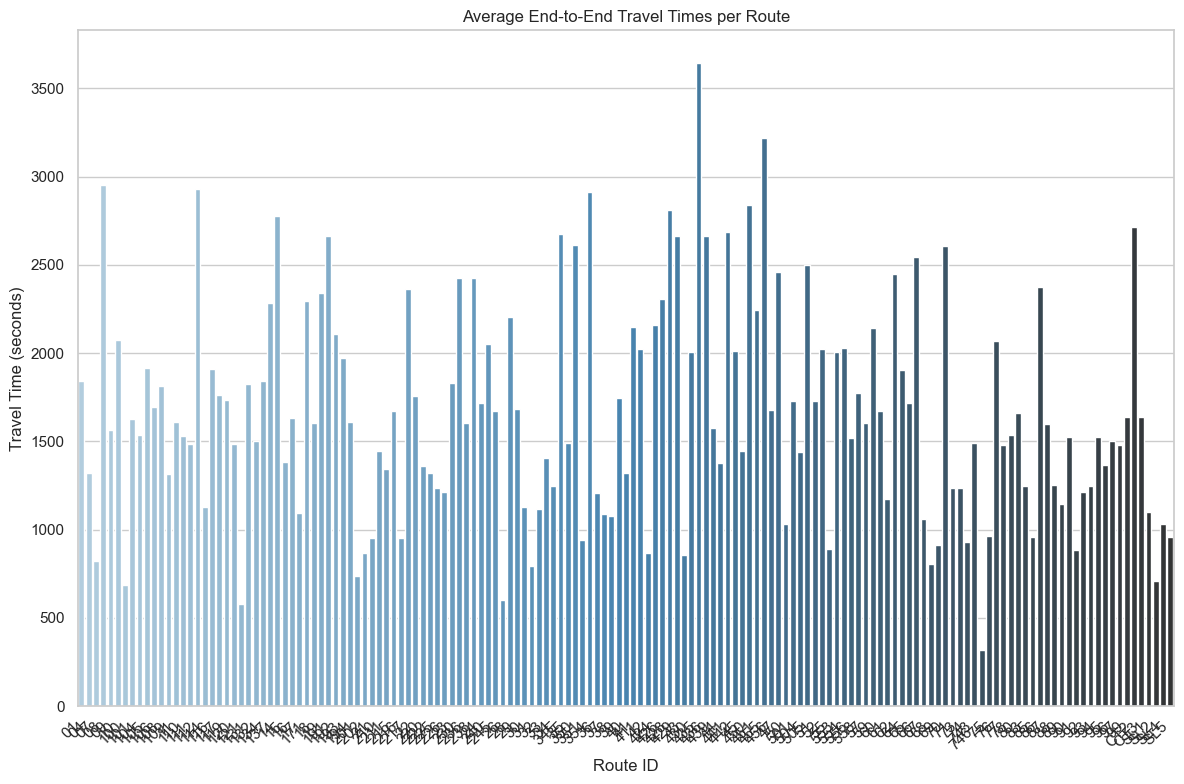

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_end_to_end_time(filename):
    # Read the CSV file
    df = pd.read_csv(filename, parse_dates=['actual', 'scheduled'])

    # Filter rows for start and end points only
    df_filtered = df[df['point_type'].isin(['Startpoint', 'Endpoint'])]

    # Group by route_id, half_trip_id, and then apply a diff function on actual time
    df_filtered = df_filtered.sort_values(by=['route_id', 'half_trip_id', 'actual'])
    df_filtered['travel_time'] = df_filtered.groupby(['route_id', 'half_trip_id'])['actual'].diff()

    # Only keep the endpoint rows which now contain the travel time in the 'travel_time' column
    df_endpoints = df_filtered[df_filtered['point_type'] == 'Endpoint']

    # Calculate mean travel time for each route
    result = df_endpoints.groupby('route_id')['travel_time'].mean()

    # Convert travel time to total seconds for plotting
    result_seconds = result.dt.total_seconds()

    return result_seconds

def plot_travel_times(result_seconds):
    # Create a bar chart using seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))
    chart = sns.barplot(x=result_seconds.index, y=result_seconds.values, palette="Blues_d")

    # Set chart title and labels
    chart.set_title('Average End-to-End Travel Times per Route')
    chart.set_ylabel('Travel Time (seconds)')
    chart.set_xlabel('Route ID')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Save the chart as an image
    plt.tight_layout()
    plt.savefig('travel_times_chart.png')
    plt.show()

# Example
filename = 'MBTA-Bus-Arrival-Departure-Times_2022-01.csv'
travel_times = calculate_end_to_end_time(filename)
plot_travel_times(travel_times)
